# Pooled OLS

En esta notebook, hacemos ols haciendo un único grupo (de aquí "pooled") de todas las observaciones que tengamos sobre los sujetos.

Primero, carguemos la notebook donde defino las variables a/p, y demás cosas

In [2]:
source("src/notebook_base.R")

Hagamos un plot, para cada variable a/p, de las distinas variables sociales en función del entrainment; es decir, siendo $X=entrainment$ y $Y=engaged\_in\_game$. Agreguemos a ésto la regresión lineal obtenida de estos datos.

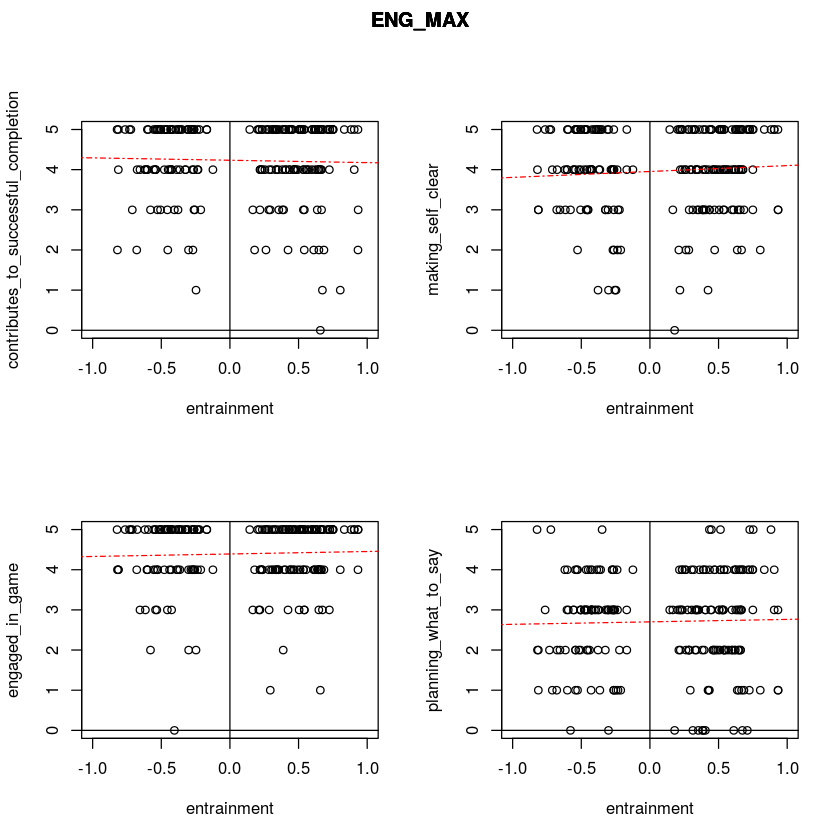

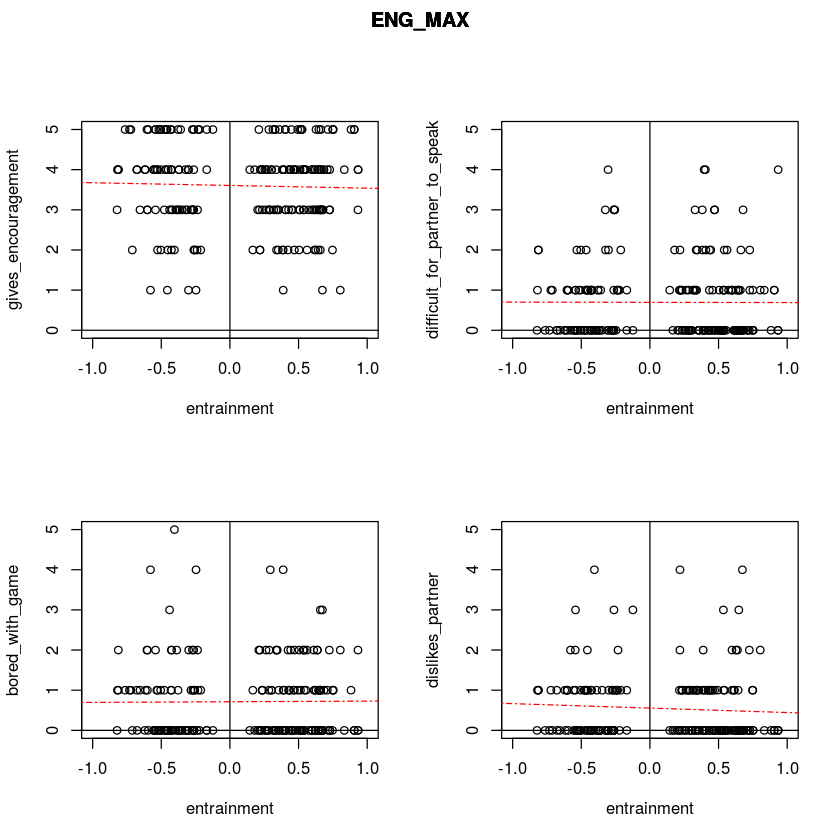

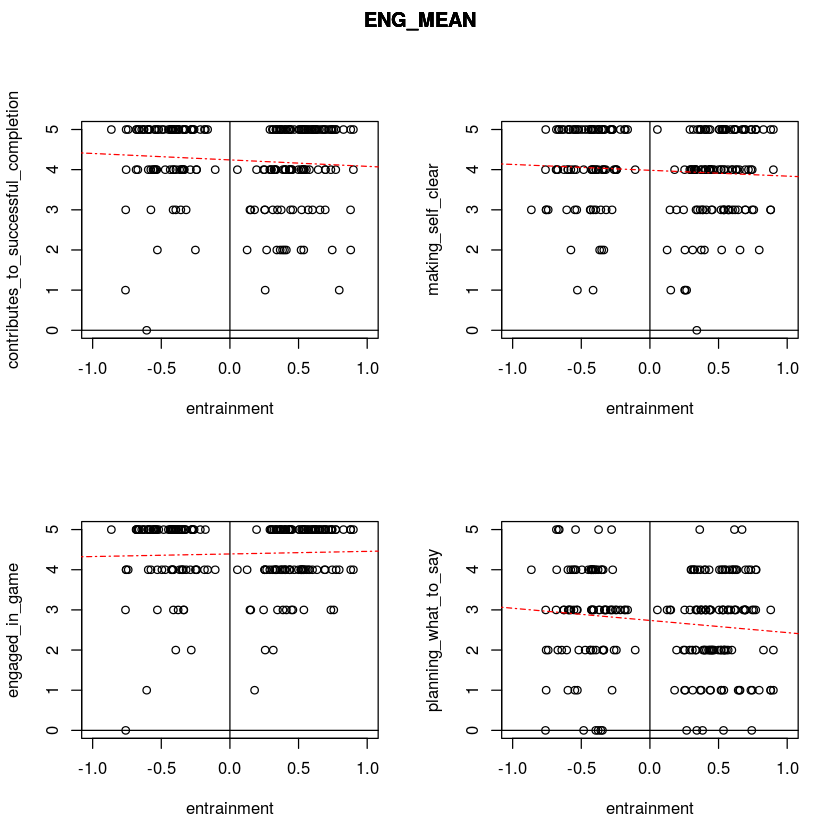

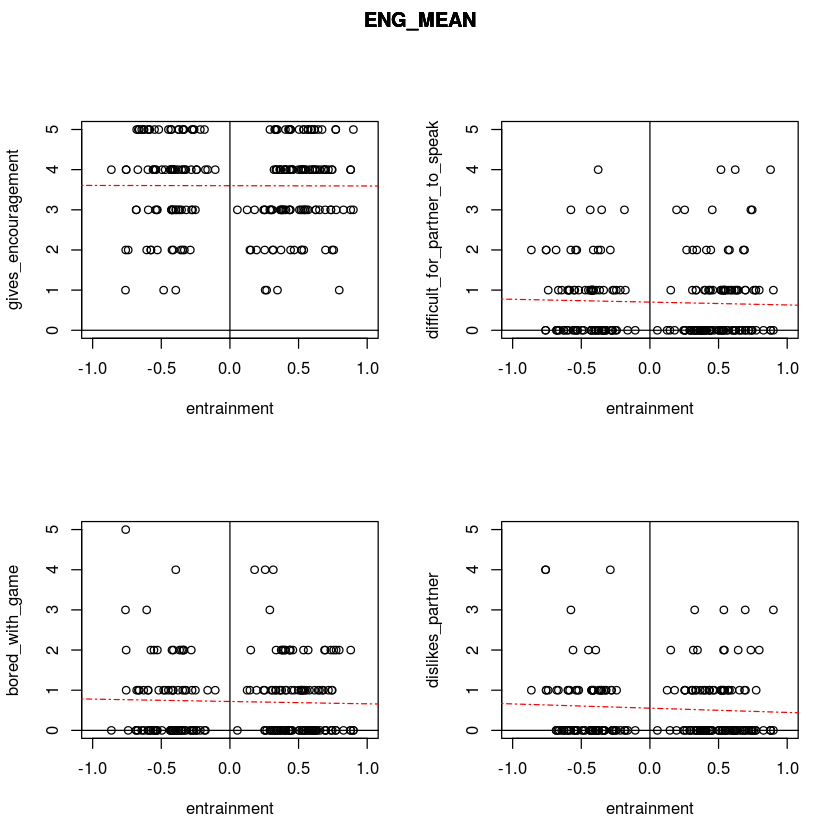

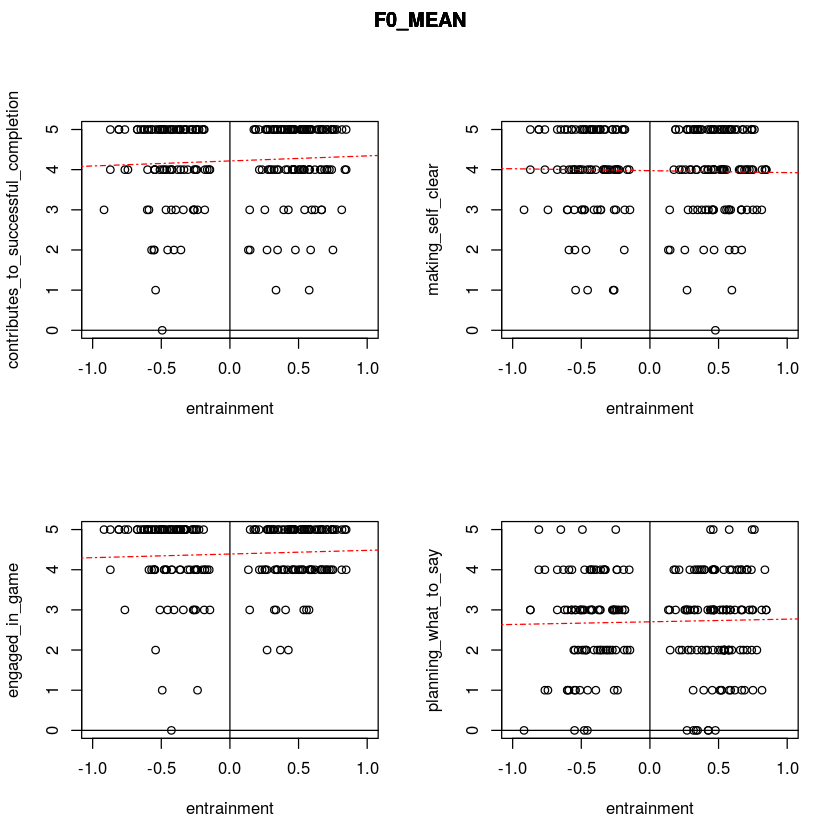

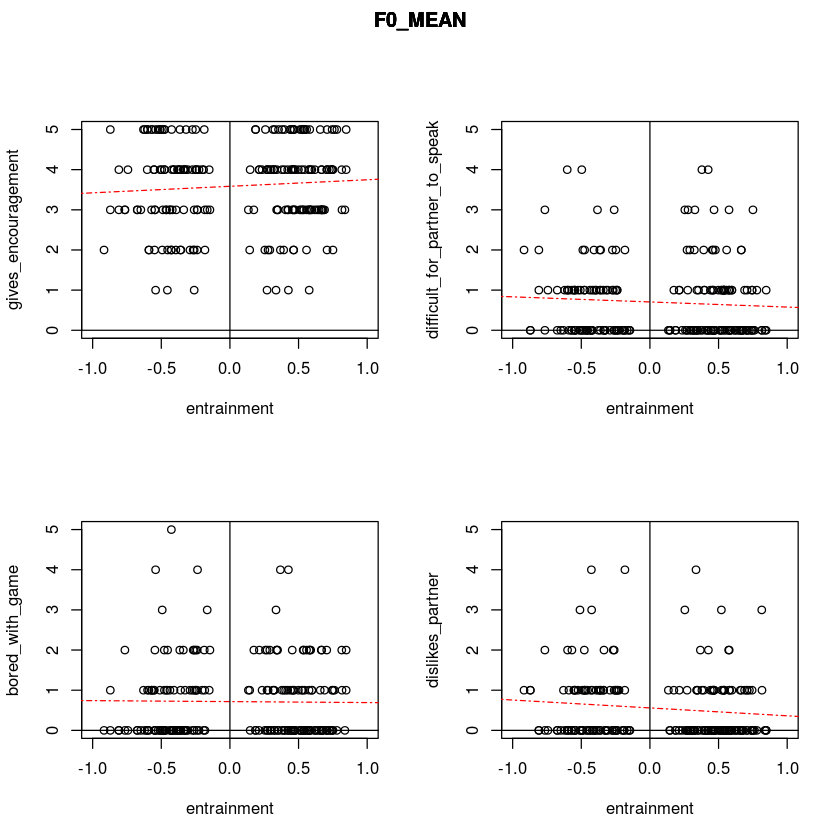

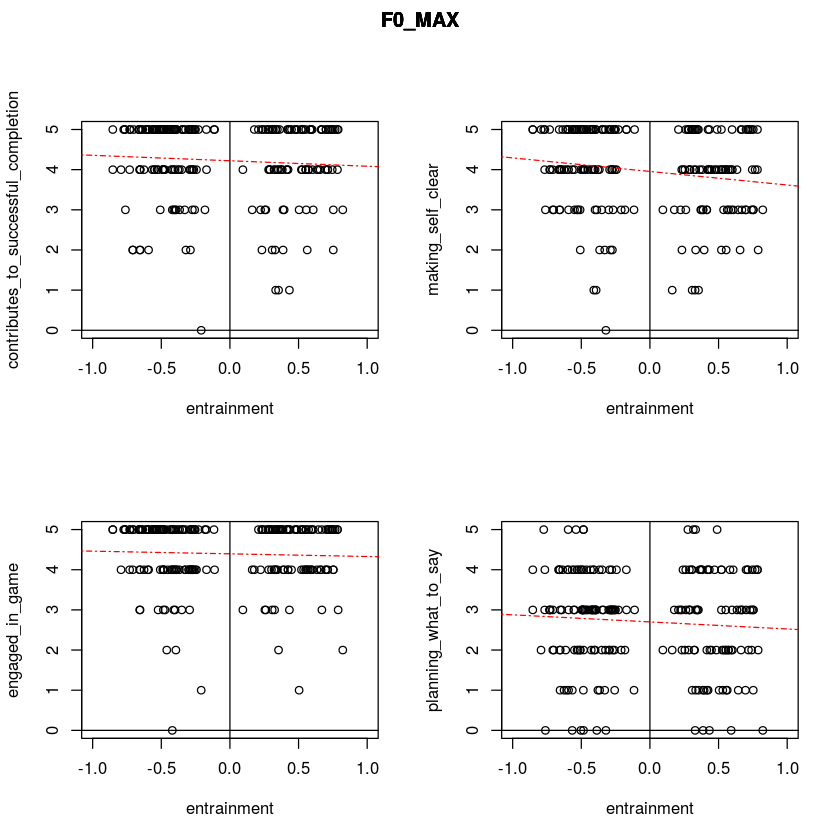

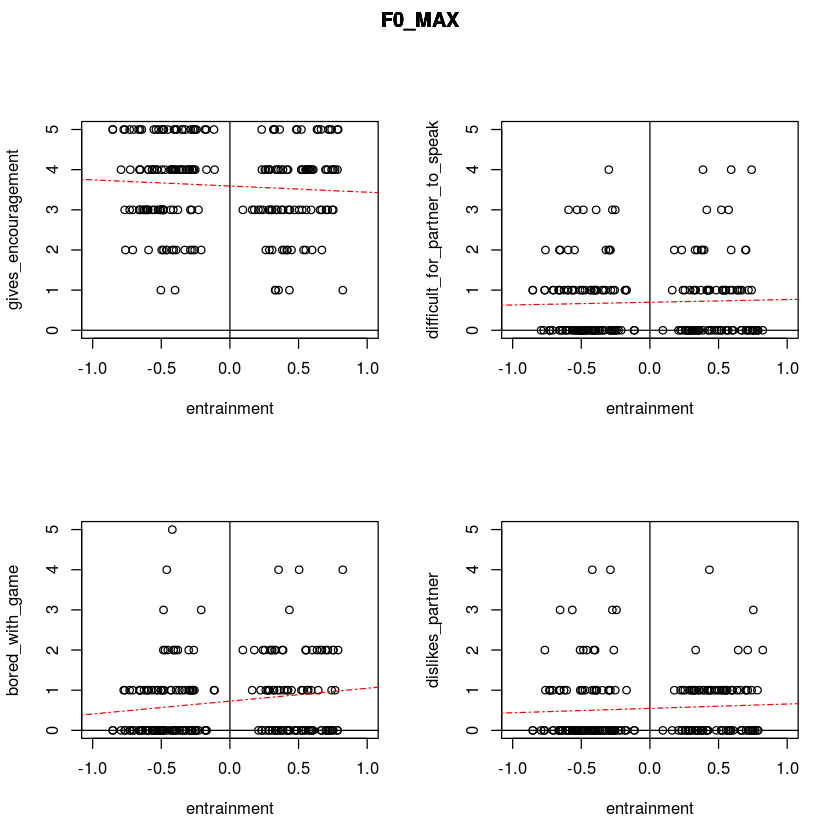

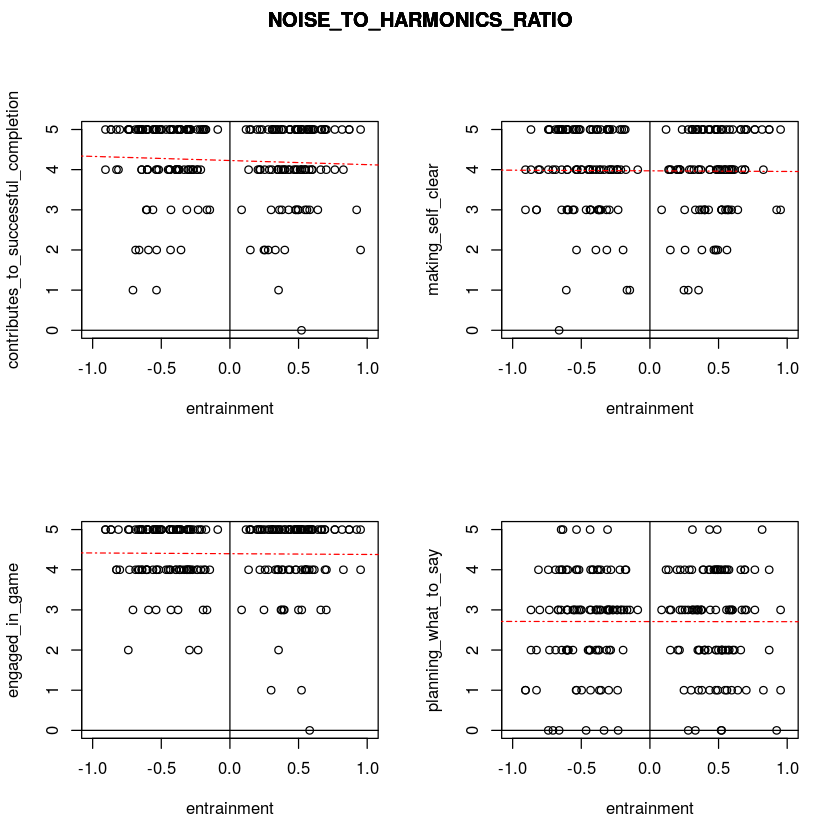

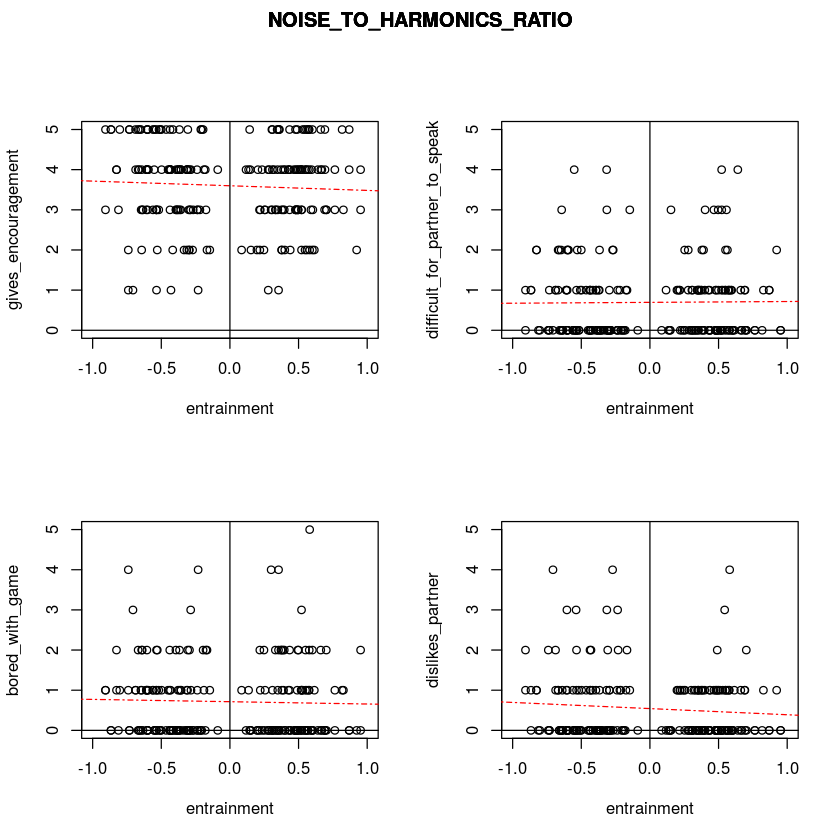

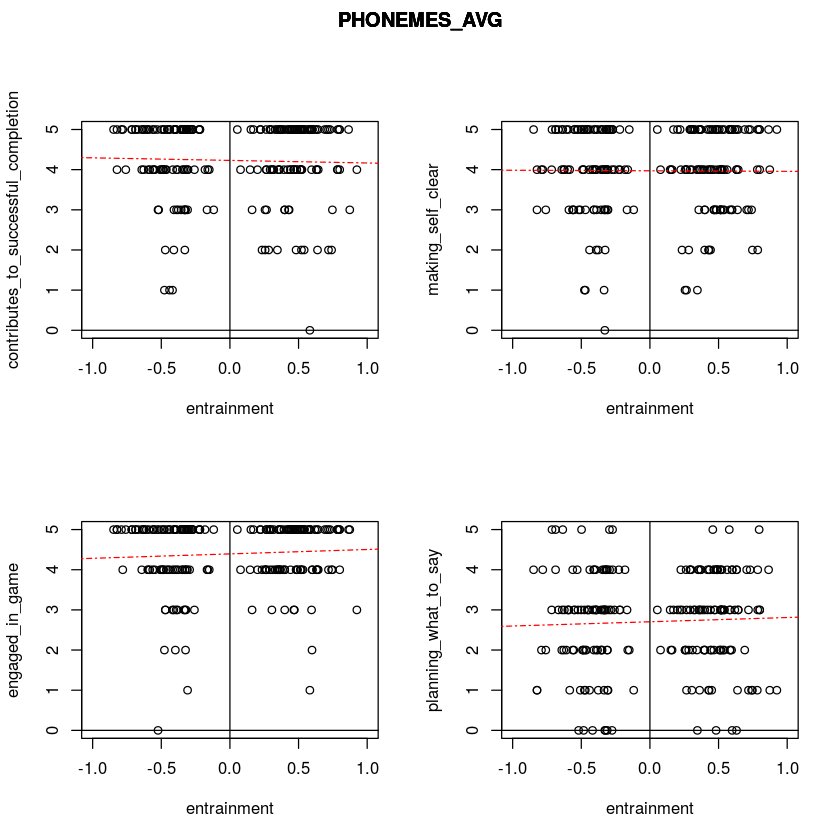

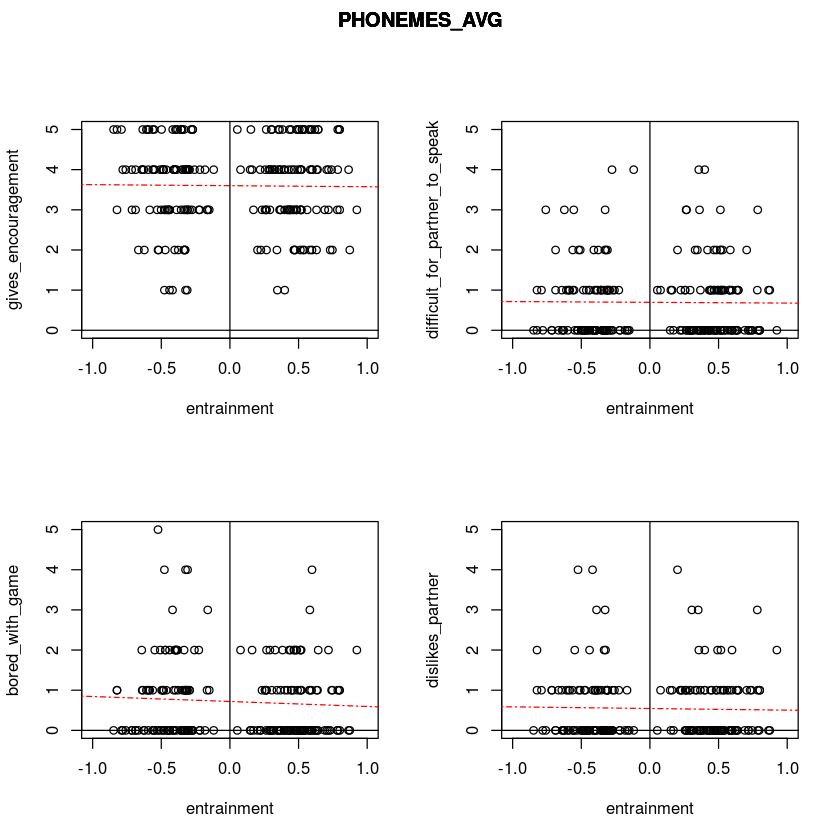

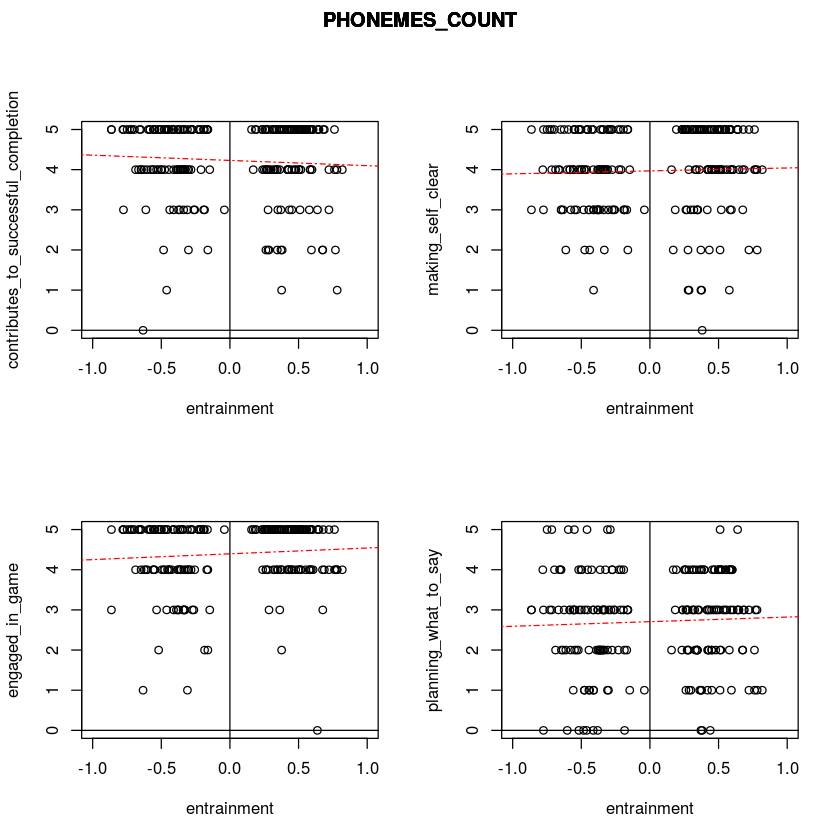

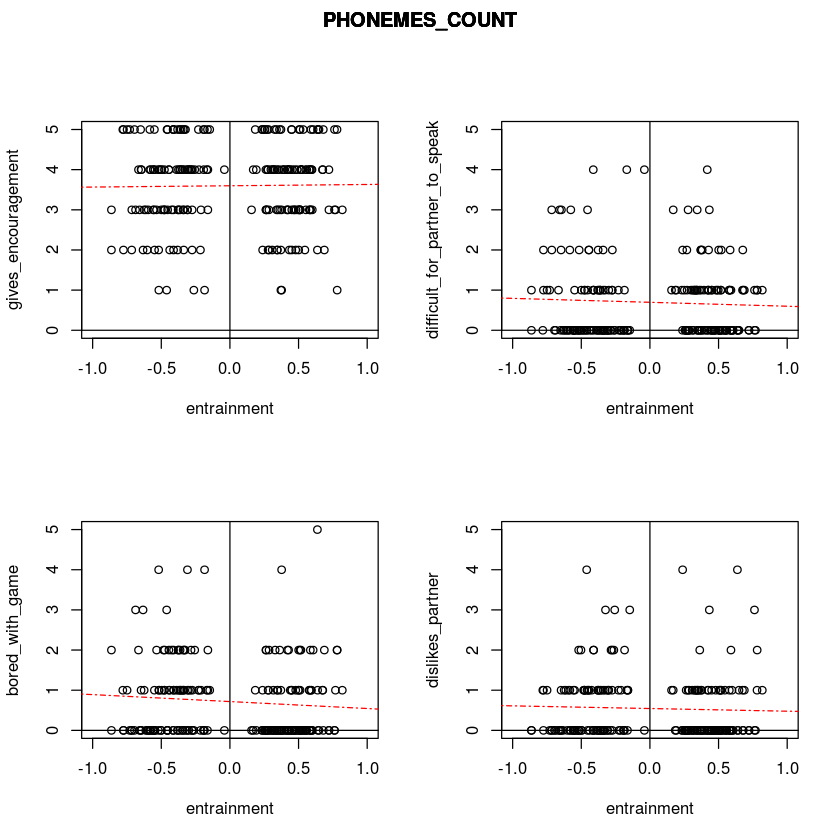

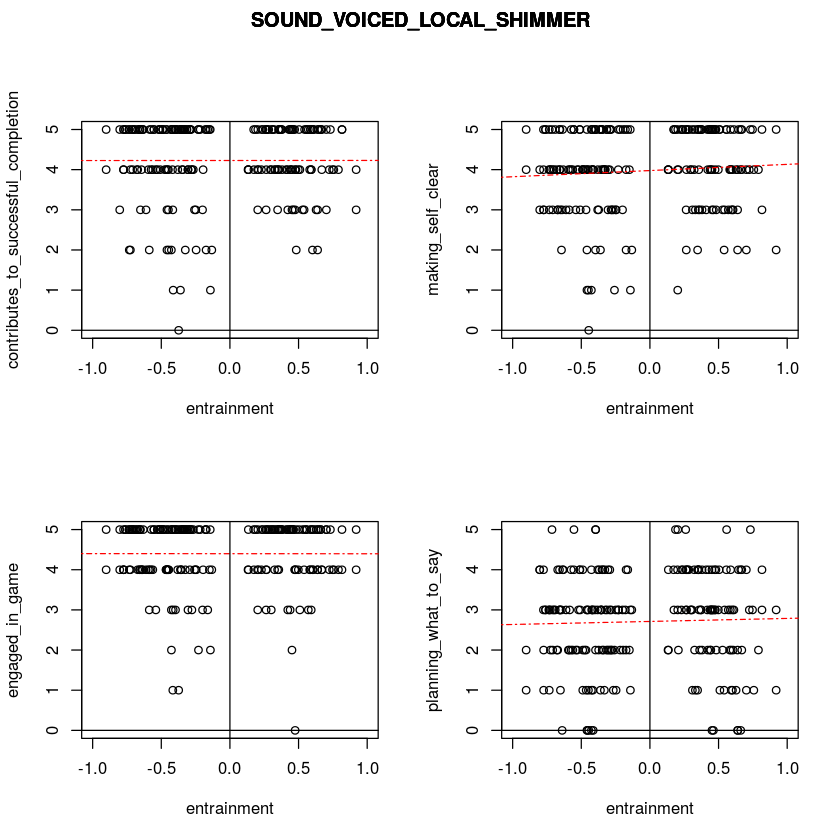

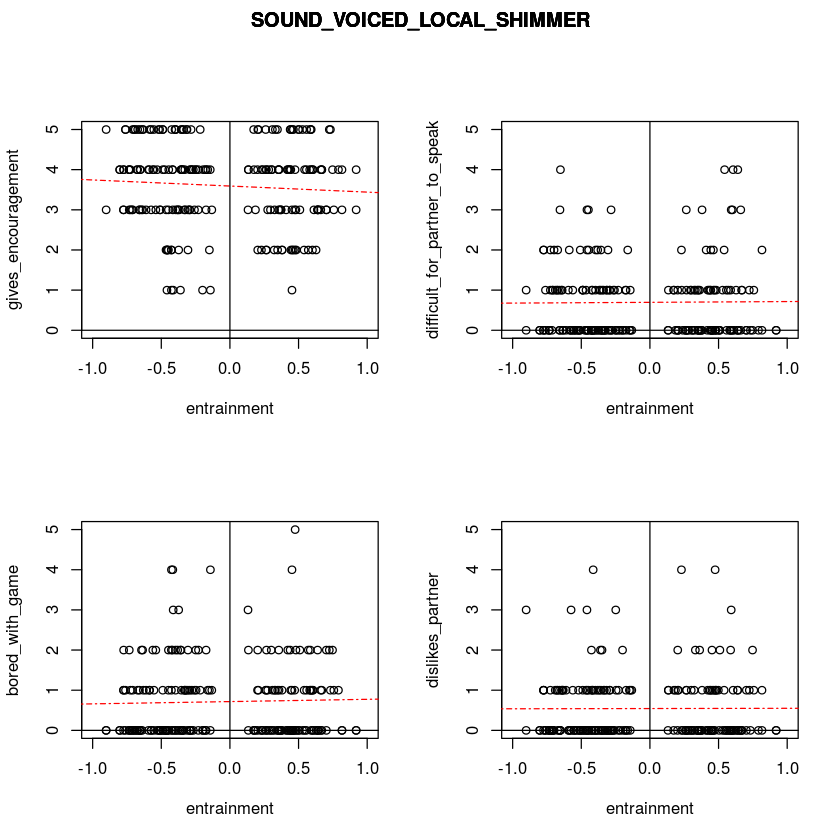

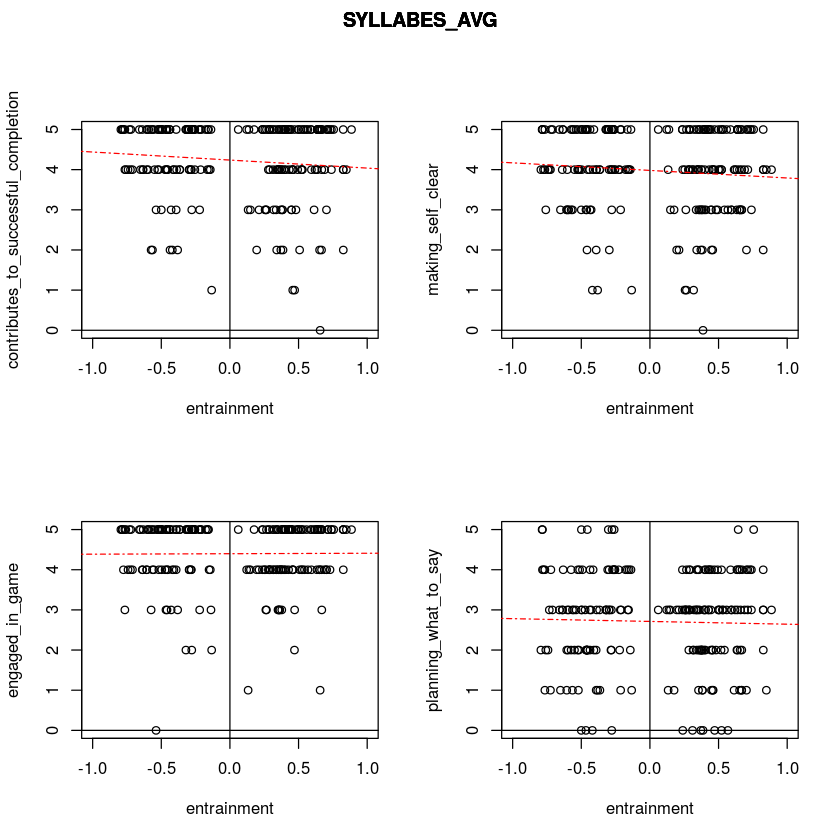

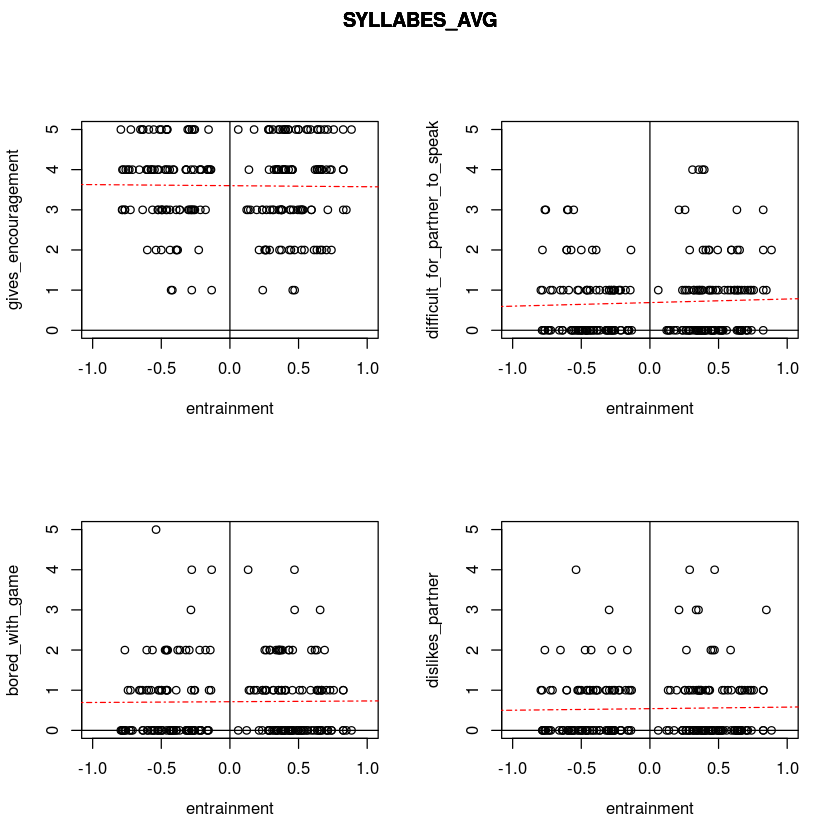

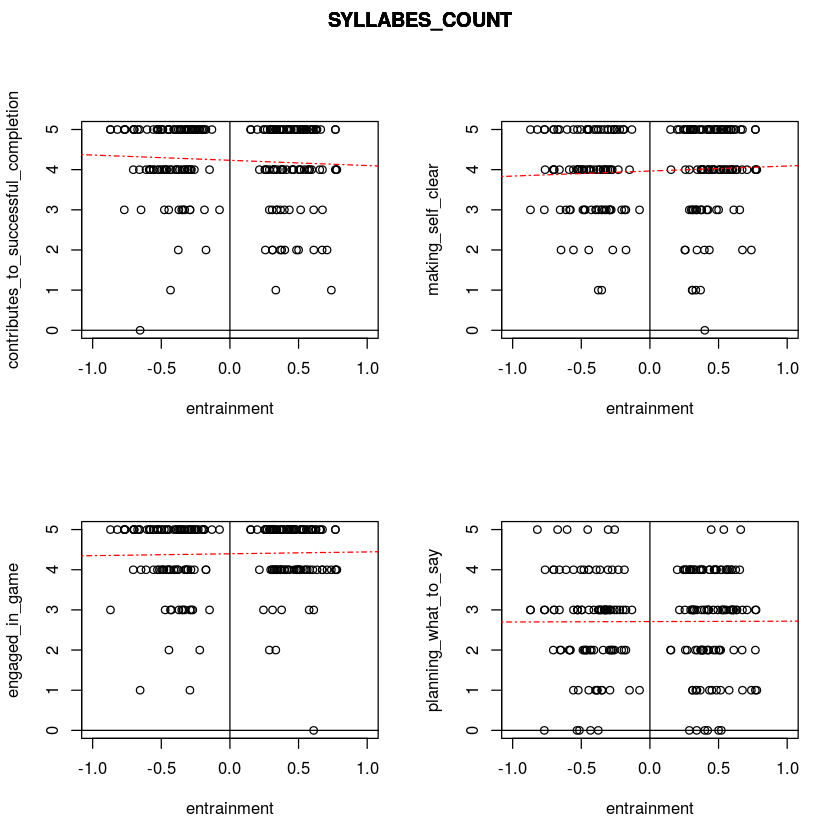

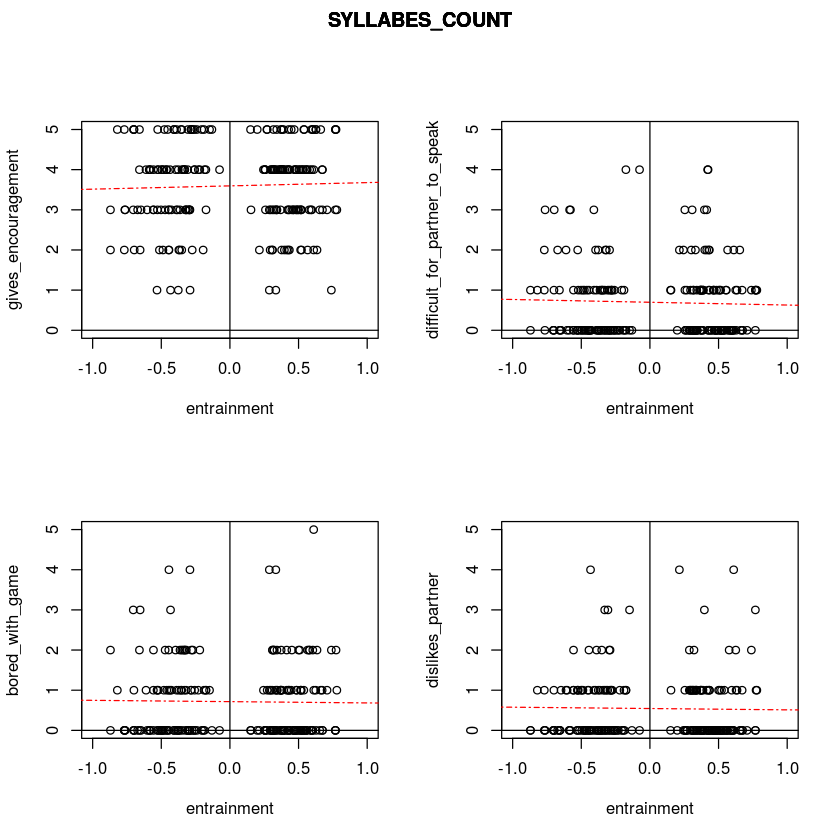

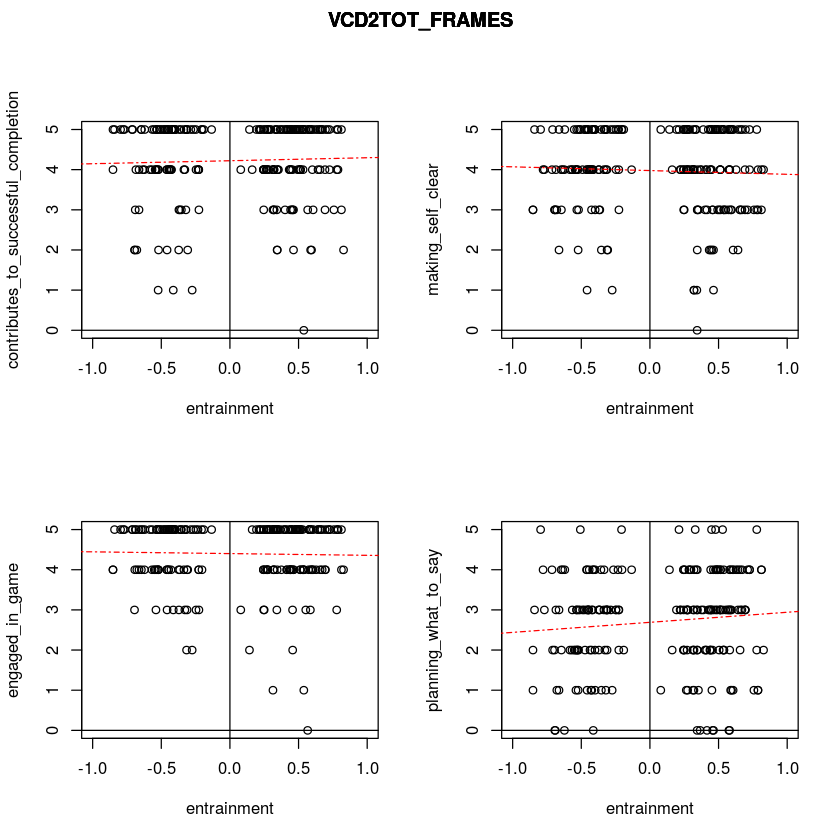

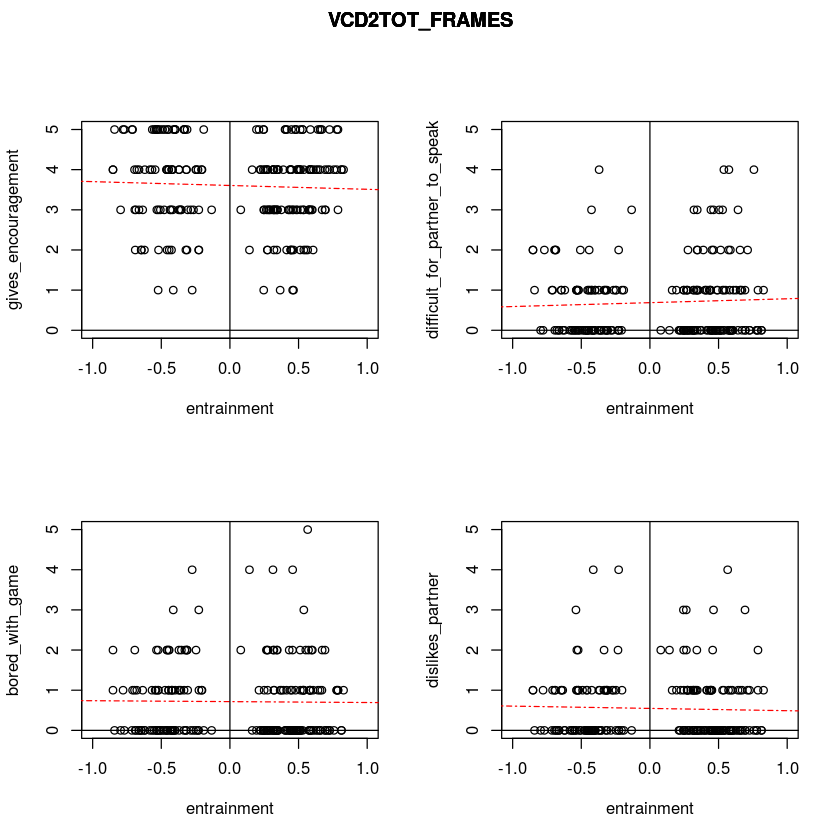

In [4]:
restart_plot <- function(ap_var, number) {
    #pdf(paste("latex/src/images/regression_", ap_var, "_", number, ".pdf", sep=""))
    par(mfrow=c(2,2), oma=c(0,0,2,0))
}


for (ap_var in ap_vars) {
    dat <- load_csv(ap_var)
    # Descomentar para mandar el output a svg's
    restart_plot(ap_var, "1")
    
    i = 1;
        
    while ( i <= length(social_vars)) {
          
        social_var <- social_vars[i]
        subdat <- dat[c("entrainment", social_var)]
              
        # Regresión de la variable social sobre el entrainment
        formula <- paste(social_var, " ~ entrainment", sep="")
        regression <- lm(formula, data=dat) 
        
        plot(subdat, xlim=c(-1, 1), ylim=c(0,5))
        abline(regression, col="red", lty="dotdash")
        abline(h=0)
        abline(v=0)
        
        title(ap_var, outer=TRUE)
        if (i == 4) {
          restart_plot(ap_var, "2")
        }
        i <- i + 1
    }
}


Ahora vamos a hacer el test de coeficientes para cada uno de éstas regresiones.

Veamos para cada de una de éstas la pendiente... ¿deberíamos ver la  

In [5]:
if (!require("lmtest")) install.packages("lmtest")

# Arma la tabla de regresión, dado un dataframe de una variable a/p
    
get_slope_coefs <- function(coefs) {
    return (as.numeric(t(coefs)[5:8]));
}

get_regression_table <- function(dat, dependent_variable="entrainment") {
    regression_table <- data.frame()

    for ( social_var in social_vars) {
        regression <- lm(paste(social_var, " ~", dependent_variable, sep=""), data=dat) 
        coefs <- coeftest(regression)
        # con ésto, me quedo sólo con los outputs del slope
        row <- get_slope_coefs(coefs)
        
        regression_table <- rbind(regression_table, row)
    }
    
    rownames(regression_table) <- social_vars
    colnames(regression_table) <- c("Estimate", "Std. Error", "t value", "Pr(>|t|)")
    
    return(regression_table)
}    

for (ap_var in ap_vars) {
    dat <- load_csv(ap_var)
    print(ap_var)
    df <- get_regression_table(dat)
    #print(xtable(df, digits=c(4,4,4,-6,4)))
    print(df)
}


[1] "ENG_MAX"
                                      Estimate Std. Error  t value Pr(>|t|)
contributes_to_successful_completion -0.059031     0.1401 -0.42134   0.6739
making_self_clear                     0.146609     0.1477  0.99278   0.3220
engaged_in_game                       0.061799     0.1179  0.52408   0.6008
planning_what_to_say                  0.061251     0.1691  0.36216   0.7176
gives_encouragement                  -0.067715     0.1487 -0.45525   0.6494
difficult_for_partner_to_speak       -0.005272     0.1305 -0.04039   0.9678
bored_with_game                       0.015808     0.1327  0.11909   0.9053
dislikes_partner                     -0.110691     0.1129 -0.98059   0.3279
[1] "ENG_MEAN"
                                      Estimate Std. Error  t value Pr(>|t|)
contributes_to_successful_completion -0.160482     0.1397 -1.14905  0.25185
making_self_clear                    -0.145539     0.1476 -0.98589  0.32533
engaged_in_game                       0.064453     0.1179  

# Pooled OLS con abs_entrainment

Hagamos lo mismo, pero en vez de usar la fórmula $ sv \sim entrainment$, usemos $ sv \sim abs(entrainment)$

PD: agregar explicación del disentrainment

In [7]:
for (ap_var in ap_vars) {
    dat <- load_csv(ap_var)
    print(ap_var)
    df <- get_regression_table(dat, dependent_variable="abs_entrainment")
    print(df)
}

[1] "ENG_MAX"
                                     Estimate Std. Error t value Pr(>|t|)
contributes_to_successful_completion -0.21888     0.3857 -0.5674  0.57103
making_self_clear                     1.19944     0.3991  3.0053  0.00298
engaged_in_game                       0.35513     0.3241  1.0959  0.27439
planning_what_to_say                  0.07329     0.4659  0.1573  0.87516
gives_encouragement                   0.61414     0.4076  1.5065  0.13344
difficult_for_partner_to_speak       -0.44468     0.3582 -1.2415  0.21582
bored_with_game                       0.09735     0.3655  0.2663  0.79025
dislikes_partner                     -0.41683     0.3103 -1.3434  0.18059
[1] "ENG_MEAN"
                                     Estimate Std. Error  t value Pr(>|t|)
contributes_to_successful_completion  0.44906     0.4031  1.11392  0.26660
making_self_clear                     0.67381     0.4245  1.58748  0.11392
engaged_in_game                       0.74939     0.3364  2.22761  0.02698
plann

# Test por coeficientes de regresión

Esto es un test para verificar como sacar los coeficientes de la pendiente de un test.

Antes teníamos un error por sacar los coeficientes de manera incorrecta del arreglo/matriz. Recordar que en R las matrices se almacenan como concatenación de columnas (de la misma manera que en Fortran)

In [8]:
dat <- load_csv("F0_MEAN")
social_var <- "bored_with_game"

regression <- lm(paste(social_var, " ~", "entrainment", sep=""), data=dat)
coefs <- coeftest(regression)
print(regression)
print(coefs)
print(as.numeric(t(coefs)[5:8]))


Call:
lm(formula = paste(social_var, " ~", "entrainment", sep = ""), 
    data = dat)

Coefficients:
(Intercept)  entrainment  
      0.716       -0.024  


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7163     0.0674   10.63   <2e-16 ***
entrainment  -0.0240     0.1334   -0.18     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] -0.02404  0.13341 -0.18020  0.85717
